# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [9]:
data = pd.read_csv('weight-height.csv')
data.set_index('Gender', inplace=True)
male_df =  data.loc['Male']
female_df =  data.loc['Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [12]:
male_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [13]:
female_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

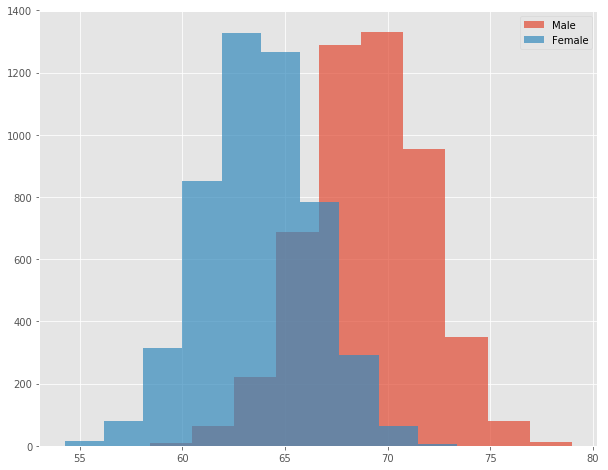

In [19]:
# Your code here
plt.figure(figsize=(10, 8))
plt.hist(male_df['Height'], alpha=0.7, label='Male');
plt.hist(female_df['Height'], alpha=0.7, label='Female');
plt.legend()
plt.show()

# Record your observations - are these inline with your personal observations?
Yes, the means for female and male heights are consistent with the data that we have.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

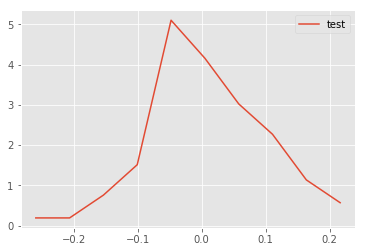

In [25]:
def density(x):
    
    n, bins = np.histogram(x, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

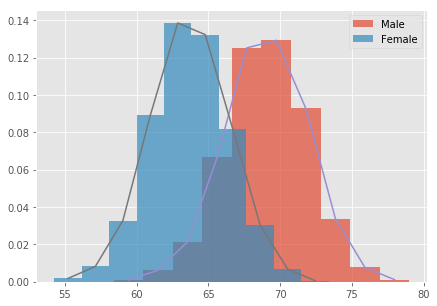

In [31]:
# Your code here 
x1, y1 = density(male_df['Height'])
x2, y2 = density(female_df['Height'])

plt.figure(figsize=(7, 5))
plt.hist(male_df['Height'], alpha=0.7, label='Male', density=True);
plt.hist(female_df['Height'], alpha=0.7, label='Female', density=True);
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

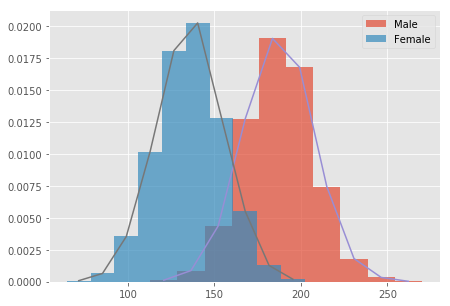

In [32]:
# Your code here 
x1, y1 = density(male_df['Weight'])
x2, y2 = density(female_df['Weight'])

plt.figure(figsize=(7, 5))
plt.hist(male_df['Weight'], alpha=0.7, label='Male', density=True);
plt.hist(female_df['Weight'], alpha=0.7, label='Female', density=True);
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.legend()
plt.show()

## Write your observations in the cell below

# Record your observations - are these inline with your personal observations?
Male and female weights and heights have similar distributions.<br>
Most men weigh around 180-200 lbs while most females weigh around 120-140 lbs.<br>
Male weight has slightly more variance than female weight

# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

C:\Users\Chris\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


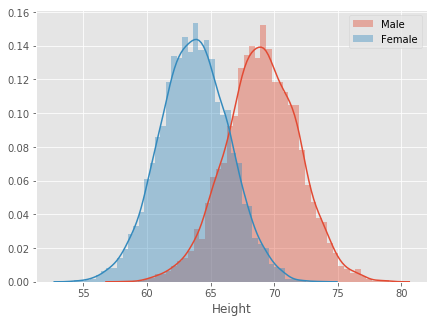

In [36]:
# Code for heights here
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.distplot(male_df['Height'], label='Male');
sns.distplot(female_df['Height'], label='Female');
plt.legend()
plt.show()

C:\Users\Chris\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


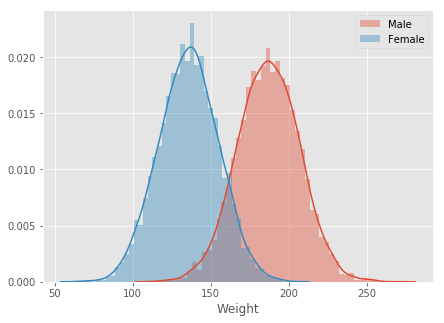

In [37]:
# Code for weights here
plt.figure(figsize=(7, 5))
sns.distplot(male_df['Weight'], label='Male');
sns.distplot(female_df['Weight'], label='Female');
plt.legend()
plt.show()

# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

Seaborn uses more bins making the density function more normal. Because it uses more bins the distribution plot is much more accurate. Seaborn is able to plot distribution and histogram much more easily with less code.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.